In [277]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [278]:
data=pd.read_csv("Global+Superstore+Data.csv")
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [279]:
data.tail()

,Order Date,Segment,Market,Sales,Profit
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000
51289,22-05-2012,Consumer,LATAM,61.380,1.8000


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [281]:
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [282]:
data.shape

(51290, 5)

### Connvert order date in the required month-year format to make it a monthly aggregated transaction data. 

In [283]:
data["Order Date"]=pd.to_datetime(data["Order Date"],format="%d-%m-%Y").dt.to_period('m')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


In [284]:
# concatenate the market and segment columns such that you get the time series data consisting of order, sales, profit, market segment
data["Market_Segment"]=data["Market"]+"_"+data["Segment"]
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [375]:
data["Market_Segment"].head(21)

0           US_Consumer
1        APAC_Corporate
2         APAC_Consumer
3        EU_Home Office
4       Africa_Consumer
5        APAC_Corporate
6         APAC_Consumer
7         APAC_Consumer
8          US_Corporate
9           US_Consumer
10         US_Corporate
11       APAC_Corporate
12        EMEA_Consumer
13    LATAM_Home Office
14        APAC_Consumer
15         EU_Corporate
16         US_Corporate
17         EU_Corporate
18       APAC_Corporate
19      Africa_Consumer
20       EMEA_Corporate
Name: Market_Segment, dtype: object

In [285]:
data["Market_Segment"].nunique()

21

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


<AxesSubplot:xlabel='Segment', ylabel='count'>

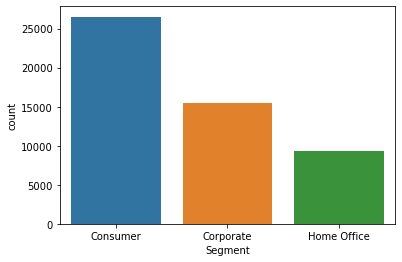

In [286]:
print(data.Segment.value_counts())
sns.countplot(data['Segment'])

* Consumer segment count is high 

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


<AxesSubplot:xlabel='Market', ylabel='count'>

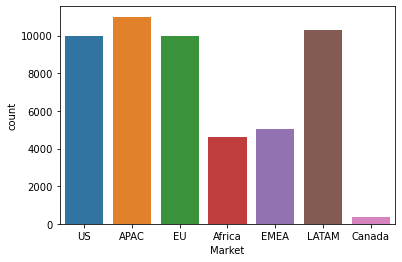

In [287]:
print(data.Market.value_counts())
sns.countplot(data['Market'])

* APAC market is larger than other market

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


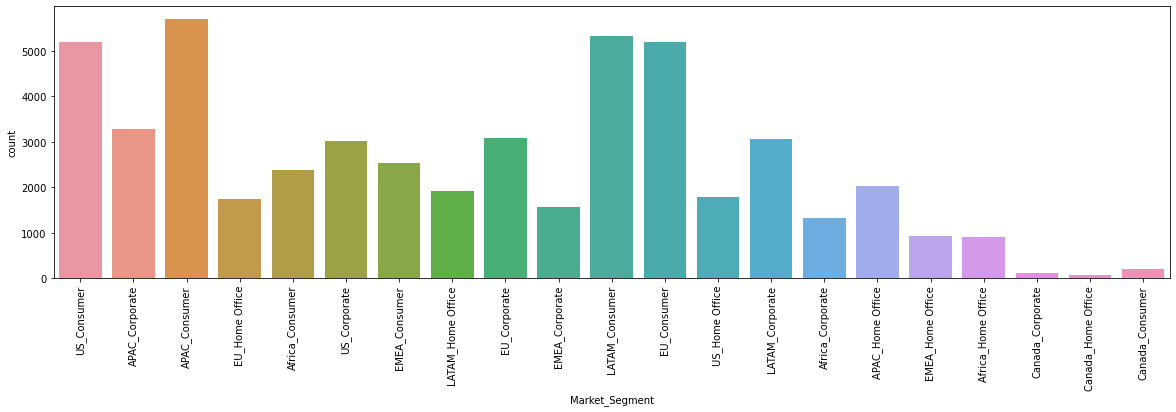

In [288]:
plt.figure(figsize=(20,5))
print(data.Market_Segment.value_counts())
sns.countplot(data['Market_Segment'])
plt.xticks(rotation=90)
plt.show()

* In Market_Segment, APAC_CONSUMER have highest count

In [289]:
# sum of profit and sales on Market_Segment
df=data.pivot_table(values="Profit",
    index="Order Date",
    columns="Market_Segment",
    aggfunc='sum')

df.head()


Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [290]:
df.shape

(48, 21)

* we get 48 months of data with Market_Segment

## Train-Test split

In [291]:
# performing the train-test split such that we take the 42 months as the train data and the 6 months as the test data.
train_len=42
train= df[0:train_len]
test=df[train_len:]

In [292]:
print(train.shape)
print(test.shape)

(42, 21)
(6, 21)


In [293]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [294]:
mean=np.mean(train)
std=np.std(train)

cov=pd.DataFrame()
cov["Mean"]= mean
cov["Std"]= std
cov["CoV"]= std/mean
cov=cov.reset_index()

cov.sort_values(by="CoV",ascending=True,inplace= True)
cov

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4223.553586,2518.944225,0.596404
12,EU_Consumer,3627.517036,2348.762579,0.647485
15,LATAM_Consumer,2252.677529,1533.362508,0.680684
13,EU_Corporate,2251.993036,1552.403019,0.689346
1,APAC_Corporate,2556.998957,1871.535073,0.731926
16,LATAM_Corporate,1075.994223,947.154491,0.880260
19,US_Corporate,1853.568607,1904.002356,1.027209
2,APAC_Home Office,1379.120743,1446.445137,1.048817
18,US_Consumer,2603.736252,2851.858407,1.095295
14,EU_Home Office,1097.441500,1223.296718,1.114681


* Inferences:
    * We can see that consumer market is big and APAC segment is largest by count
    * From above chart, APAC_consumer has very low CoV. 
    * So we conclude that in Market_Segment, APAC_CONSUMER is most profitable market.
    * we take APAC_CONSUMER for forcasting
 

In [295]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [296]:
data.drop(["Profit","Market","Segment"],inplace=True,axis=1)
data.head()

,Order Date,Sales,Market_Segment
0,2012-07,2309.650,US_Consumer
1,2013-02,3709.395,APAC_Corporate
2,2013-10,5175.171,APAC_Consumer
3,2013-01,2892.510,EU_Home Office
4,2013-11,2832.960,Africa_Consumer


In [297]:
df_1=data[data.Market_Segment=="APAC_Consumer"]
df_1.head()

,Order Date,Sales,Market_Segment
2,2013-10,5175.171,APAC_Consumer
6,2011-11,1822.080,APAC_Consumer
7,2012-04,5244.840,APAC_Consumer
14,2013-06,3701.520,APAC_Consumer
29,2012-02,1878.720,APAC_Consumer


In [298]:
df_1.drop(["Market_Segment"],inplace=True,axis=1)
df_1.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-11,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [299]:
df_2 = df_1.groupby('Order Date').sum()
df_2.head()

,Sales
Order Date,
2011-01,15711.7125
2011-02,12910.8588
2011-03,19472.5632
2011-04,15440.3046
2011-05,24348.9723


In [300]:
df_2 = df_2.to_timestamp()

In [301]:
df_2.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [302]:
df_2.shape

(48, 1)

In [303]:
# performing the train-test split such that we take the 42 months as the train data and the 6 months as the test data.
train_len=42
train= df_2[0:train_len]
test=df_2[train_len:]

In [304]:
train.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


In [305]:
train.shape

(42, 1)

<AxesSubplot:xlabel='Order Date'>

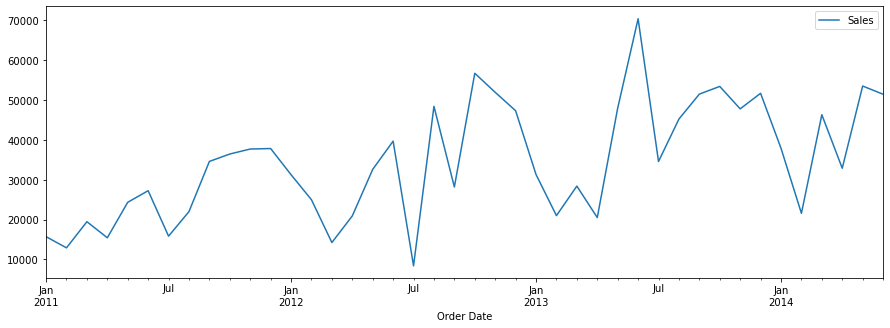

In [306]:
train.plot(figsize=(15,5))

## Time series Decomposition

### Additive seasonal decomposition

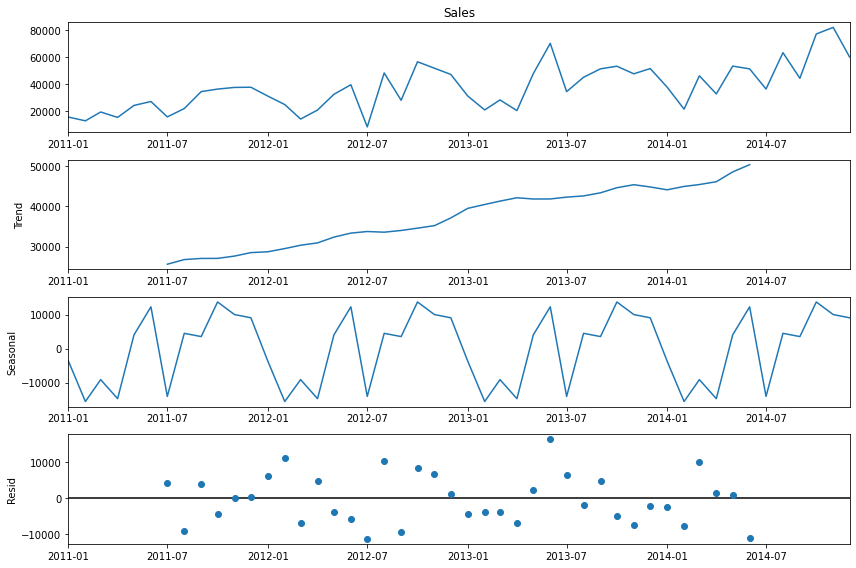

In [307]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_2.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

## Multiplicative seasonal decomposition

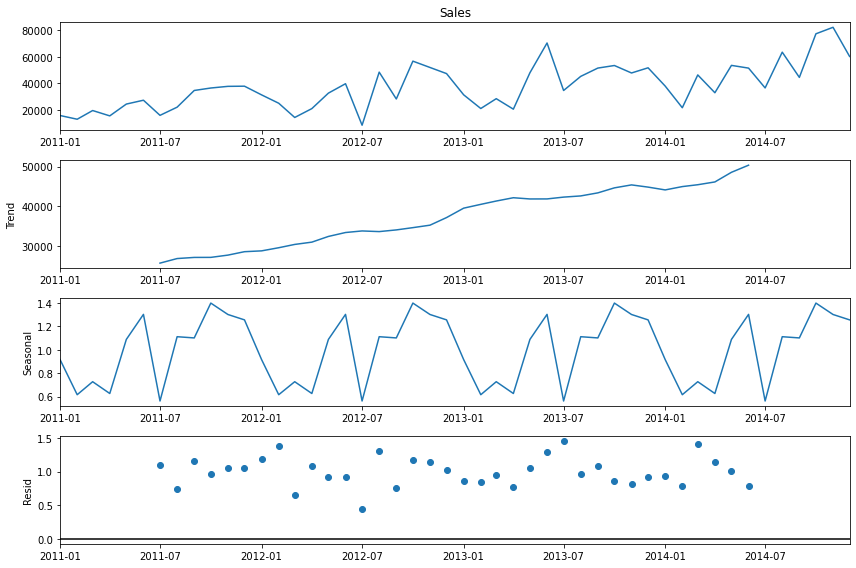

In [308]:
decomposition = sm.tsa.seasonal_decompose(df_2.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

# Simple time series methods

## Naive method

In [309]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

### Plot train, test and forecast

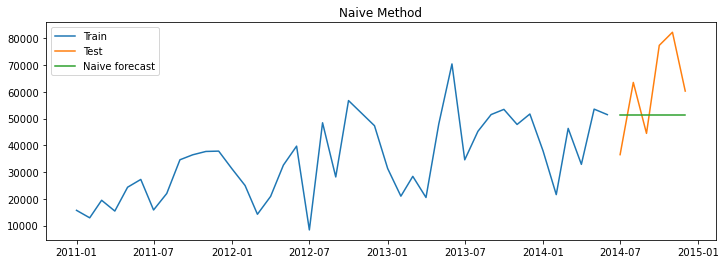

In [310]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [311]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


## Simple average method

In [312]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### Plot train, test and forecast

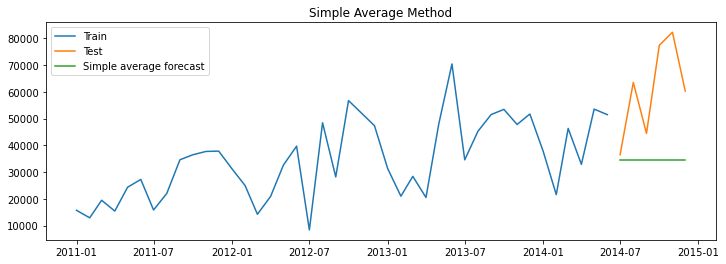

In [313]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [314]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


## Simple moving average method

In [315]:
y_hat_sma = df_2.copy()
ma_window = 2
y_hat_sma['sma_forecast'] = df_2['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

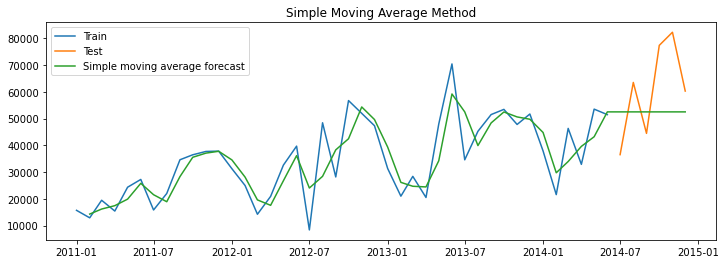

In [316]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [317]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73


# Exponential smoothing methods

## Simple exponential smoothing

In [318]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)


### Plot train, test and forecast

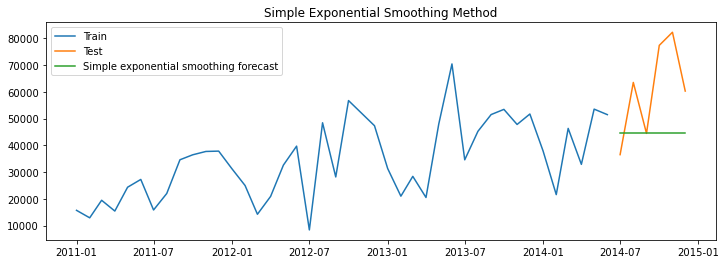

In [319]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [320]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70


## Holt's method with trend

In [321]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.45285714285714285, 'smoothing_trend': 0.0646938775510204, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.7125, 'initial_trend': -2800.8536999999997, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

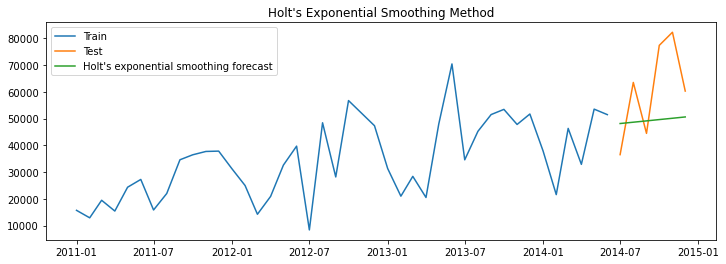

In [322]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [323]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12


## Holt Winters' additive method with trend and seasonality

In [324]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

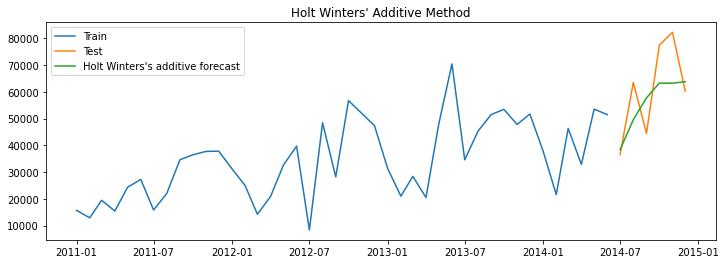

In [325]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [326]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32


## Holt Winter's multiplicative method with trend and seasonality

In [327]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

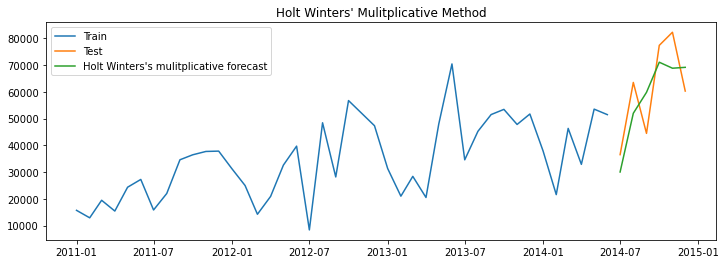

In [328]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [329]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27


 ### * From the Smoothing Techniques, we can conclude that Holt Winter's Additive Method is giving the better forecast

# Auto Regressive methods

## Stationarity vs non-stationary time series

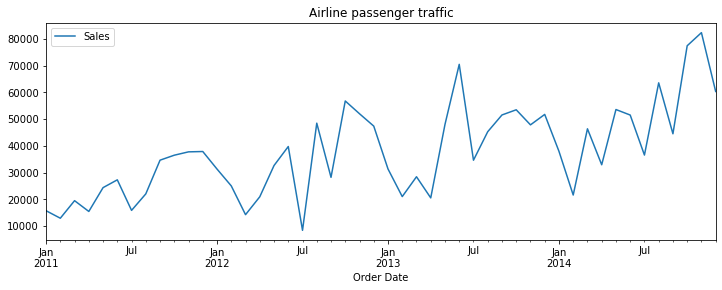

In [330]:
df_2['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [332]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_2['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


In [333]:
adf_test

(-2.2208569941463683,
 0.1987628396941694,
 1,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 821.7139299195838)

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [334]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_2['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


### Box Cox transformation to make variance constant

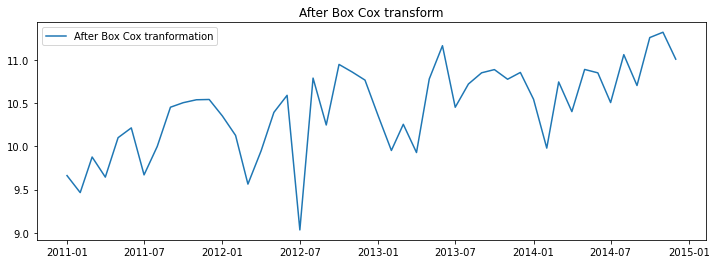

In [335]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_2['Sales'], lmbda=0), index = df_2.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

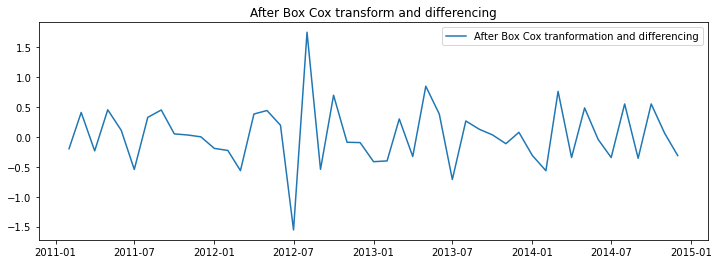

In [337]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_2.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [340]:
data_boxcox_diff.dropna(inplace=True)

In [341]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [347]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [348]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


## Auto regression method (AR)

In [351]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover original time series

In [352]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

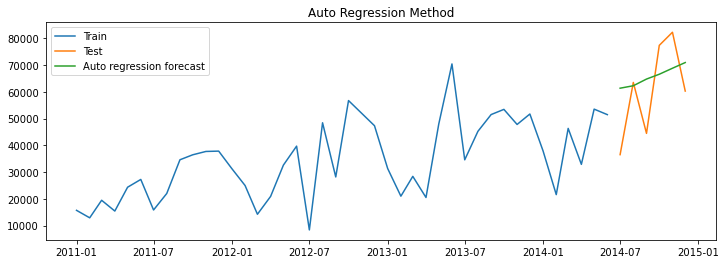

In [353]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [354]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.03,27.27


## Moving average method (MA)

In [355]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [356]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

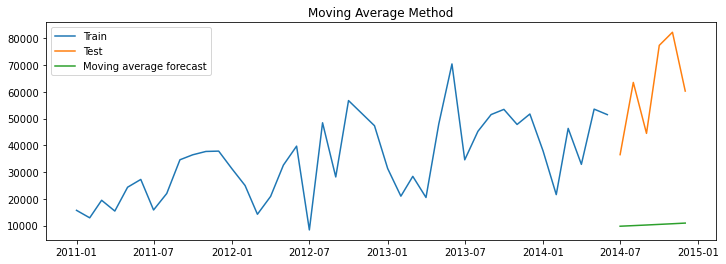

In [359]:
plt.figure(figsize=(12,4))
plt.plot(df_2['Sales'][:train_len], label='Train')
plt.plot(df_2['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [360]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.03,27.27
0,Moving Average (MA) method,52903.35,81.64


## Auto regression moving average method (ARMA)

In [361]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115923
ma.L1.y   -0.999970
dtype: float64


### Recover original time series

In [362]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

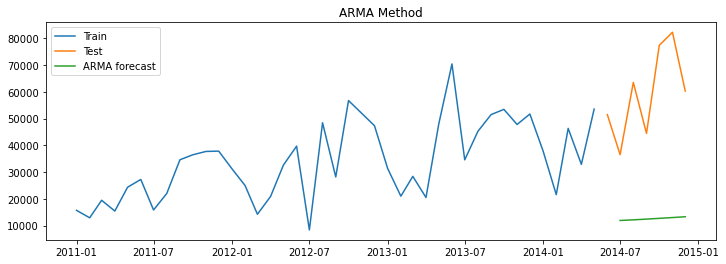

In [363]:
plt.figure(figsize=(12,4))
plt.plot( df_2['Sales'][:train_len-1], label='Train')
plt.plot(df_2['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [364]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.03,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.91,77.66


## Auto regressive integrated moving average (ARIMA)

In [366]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115923
ma.L1.D.y   -0.999970
dtype: float64


### Recover original time series forecast

In [367]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

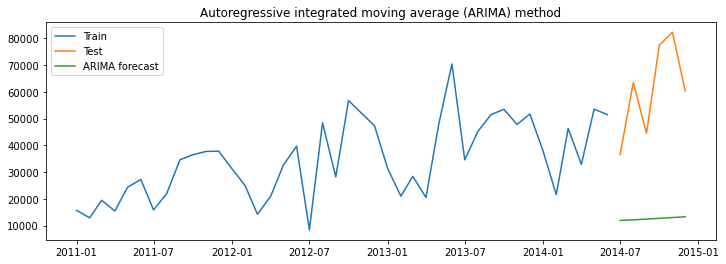

In [368]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [369]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.03,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.91,77.66


## Seasonal auto regressive integrated moving average (SARIMA)

In [370]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.099689
ma.L1      -0.994635
ar.S.L12   -0.396340
ma.S.L12   -0.986822
sigma2      0.047238
dtype: float64


### Recover original time series forecast

In [371]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

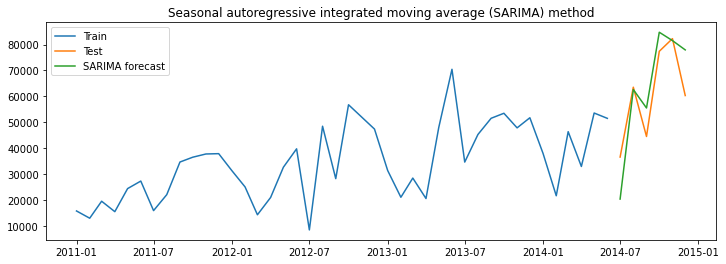

In [372]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [373]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winters' additive method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.03,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.91,77.66


# Conclusion
Thus we can conclude that, Holt Winters additive method is the best forecasting method in the smoothing technique
And SARIMA - Seasonal Autoregressive Integrated moving average is the best method in ARIMA set of techniques.
Because both techanique have least value of RMSE AND MAPE
 